In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
column_names = ['class', 'Alcohol', 'Malic_acid', 'Ash',
                'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
               'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
               'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv('wine_data.csv', names=column_names, header=None)

In [3]:
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.tail()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
data.isnull().sum()

class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [7]:
data.shape

(178, 14)

In [8]:
y = data['class']
X = data.drop('class', axis=1)

### Подбор гиперпараметров алгоритма по кросс-валидации

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree_params = {'max_depth': range(1,11), 'max_features': range(4, 14)}

tree_grid = GridSearchCV(tree, tree_params, cv=5,
                         scoring='accuracy', n_jobs=-1, 
                         verbose=True)
tree_grid.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 14)},
             pre_dispatch='2*n

In [11]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 10}

In [12]:
round(tree_grid.best_score_, 3)

0.933

#### Постороение validation curve для гиперпараметра max_depth при остальных фиксированных параметрах.

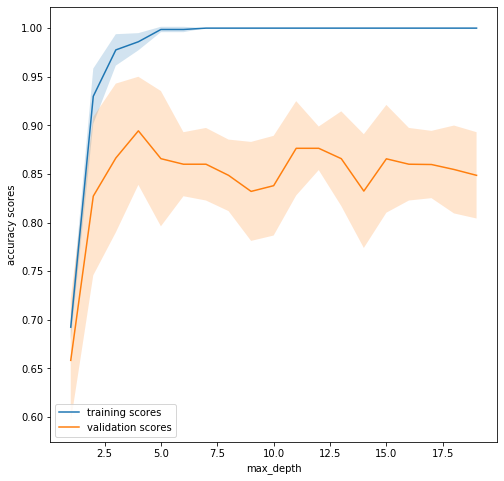

In [13]:
from sklearn.model_selection import validation_curve

alphas = np.arange(1, 20)
val_train, val_test = validation_curve(tree, X, y, 'max_depth', alphas, cv=5)

def plot_with_err(x, data, label):
    mu, std = data.mean(axis=1), data.std(axis=1)
    lines = plt.plot(x, mu, label=label)
    plt.fill_between(x, mu - std, mu + std, facecolor=lines[0].get_color(), alpha=0.2)
    
plt.figure(figsize=(8, 8))
plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel('max_depth')
plt.ylabel('accuracy scores')
plt.legend();

Тренировочная и валидационная ошибки значительно отличаются и две кривые расположены далеко друг от друга - модель переобучилась.

#### Построение learning curve для алгоритма с уже подобранными параметрами.

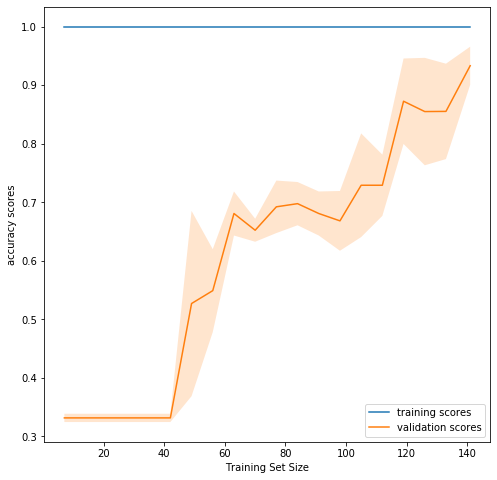

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

def plot_learning_curve(max_depth=6, max_features=7):
    train_sizes = np.linspace(0.05, 1, 20)
    pipe = Pipeline([('tree', DecisionTreeClassifier(max_depth=max_depth, max_features=max_features))])
    
    N, val_train, val_test = learning_curve(pipe, X, y,
                                           train_sizes=train_sizes, cv=5,
                                           scoring='accuracy')
    
    plt.figure(figsize=(8, 8))
    plot_with_err(N, val_train, label='training scores')
    plot_with_err(N, val_test, label='validation scores')
    plt.xlabel('Training Set Size')
    plt.ylabel('accuracy scores')
    plt.legend();
    
plot_learning_curve(max_depth=6, max_features=7)
    

Для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации сильно отличаются - модель переобучилась.

#### Увеличение числа признаков с помощью добавления полиномиальных признаков. Построение матрицы корреляций.

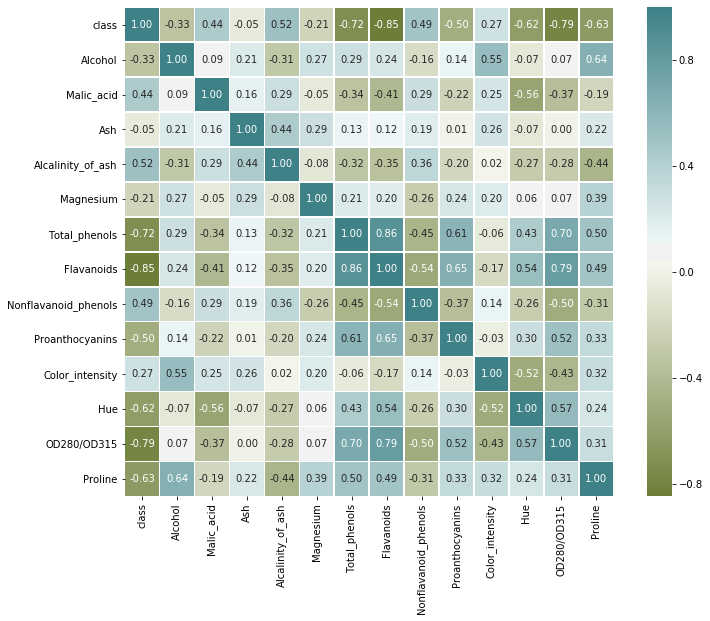

In [15]:
plt.figure(figsize=(12, 9))

corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.6, fmt='.2f',\
           mask=np.zeros_like(corr, dtype=np.bool),\
           cmap=sns.diverging_palette(100, 200, as_cmap=True), square=True);

- Между целевой переменной class и признаком Ash слабая корреляция - коэффициент корреляции составляет всего лишь -0.05. 
- Сильная корреляция между признаками Total_phenols и Flavanoids, коэффициент корреляции равен 0.86. 
- Сильная корреляция между признаками OD280/OD315 и Flavanoids, коэффициент корреляции равен 0.79. 
- Сильная корреляция между признаками Total_phenols и OD280/OD315, коэффициент корреляции равен 0.70.

In [16]:
new_data = data.drop(['Ash', 'Total_phenols', 'Flavanoids'], axis=1)
new_data.shape

(178, 11)

In [17]:
target = new_data['class']
feature_matrix = new_data.drop('class', axis=1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(feature_matrix, target, test_size=0.2)
tree_clf = DecisionTreeClassifier()

params = {'max_depth': range(1, 11), 'max_features': range(3, 11)}

tree_grid_cv = GridSearchCV(tree_clf, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=True)
tree_grid_cv.fit(train_x, train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.3s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(3, 11)},
             pre_dispatch='2*n

In [19]:
tree_grid_cv.best_params_

{'max_depth': 5, 'max_features': 4}

In [20]:
round(tree_grid_cv.best_score_, 3)

0.923

In [21]:
pipe_tree = Pipeline([('features', PolynomialFeatures(degree=2)),
                 ('tree', DecisionTreeClassifier(max_depth=tree_grid_cv.best_params_['max_depth'], max_features=tree_grid_cv.best_params_['max_features']))])

pipe_tree.fit(train_x, train_y)
round(accuracy_score(test_y, pipe_tree.predict(test_x)), 3)

0.944

In [22]:
round(accuracy_score(train_y, pipe_tree.predict(train_x)), 3)

1.0

Удаление сильно коррелирующих признаков и добавление полиномиальных признаков позволило улучшить качество алгоритма.

#### Решение исходной задачи линейными методами. Решение исходной задачи с помощью SVMClassifier с линейными и нелинейными ядрами.

In [23]:
target = data['class']
features = data.drop('class', axis=1)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc_pipe_linear = Pipeline([('scaler', StandardScaler()), 
                     ('svc', SVC(kernel='linear'))])

param_grid_linear = {'svc__C': np.logspace(-2, 1, 20)}

grid_svc_linear = GridSearchCV(svc_pipe_linear, param_grid_linear, cv=3, scoring='accuracy', n_jobs=-1)

grid_svc_linear.fit(features, target)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking...
                                verbose=False),
             iid='warn', n_jobs=-1,
     

In [25]:
grid_svc_linear.best_params_

{'svc__C': 0.01438449888287663}

In [26]:
round(grid_svc_linear.best_score_, 3)

0.966

In [27]:
svc_pipe_rbf = Pipeline([('scaler', StandardScaler()), 
                     ('svc', SVC(kernel='rbf'))])

param_grid_rbf = {'svc__C': np.logspace(-2, 1, 20)}

grid_svc_rbf = GridSearchCV(svc_pipe_rbf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1)

grid_svc_rbf.fit(features, target)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=Tr...
                                verbose=False),
             iid='warn', n_jobs=-1,
     

In [28]:
grid_svc_rbf.best_params_

{'svc__C': 2.3357214690901213}

In [29]:
round(grid_svc_rbf.best_score_, 3)

0.989

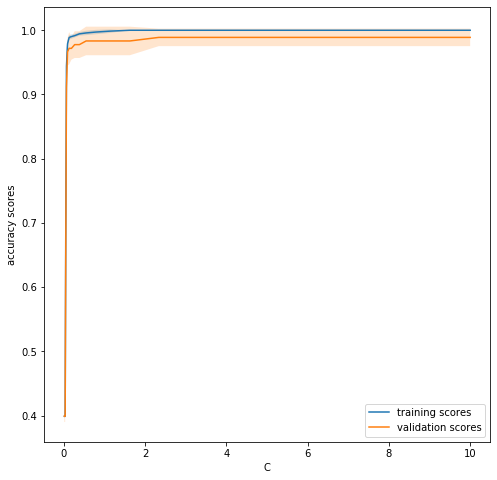

In [30]:
# validation_curve

alphas = np.logspace(-2, 1, 20)
val_train, val_test = validation_curve(svc_pipe_rbf, X, y, 'svc__C', alphas, cv=5)

def plot_with_err(x, data, label):
    mu, std = data.mean(axis=1), data.std(axis=1)
    lines = plt.plot(x, mu, label=label)
    plt.fill_between(x, mu - std, mu + std, facecolor=lines[0].get_color(), alpha=0.2)
    
plt.figure(figsize=(8, 8))
plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel('С')
plt.ylabel('accuracy scores')
plt.legend();

Две кривые располагаются достаточно близко друг от друга и ошибки невелики - неплохое качество алгоритма.

In [31]:
svc_pipe_poly = Pipeline([('scaler', StandardScaler()), 
                     ('svc', SVC(kernel='poly', degree=3))])

param_grid_poly = {'svc__C': np.logspace(-2, 1, 20)}

grid_svc_poly = GridSearchCV(svc_pipe_poly, param_grid_poly, cv=3, scoring='accuracy', n_jobs=-1)

grid_svc_poly.fit(features, target)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='poly', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=T...
                                verbose=False),
             iid='warn', n_jobs=-1,
     

In [32]:
grid_svc_poly.best_params_

{'svc__C': 10.0}

In [33]:
round(grid_svc_poly.best_score_, 3)

0.949

#### Решение исходной задачи с помощью наивного байесовского классификатора.

In [34]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

model = MultinomialNB().fit(X_train, y_train)
prediction = model.predict(X_test)

#print(np.mean(prediction == y_test))
print(round(accuracy_score(y_test, model.predict(X_test)), 3))

0.944


In [35]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB().fit(X_train, y_train)
prediction1 = model1.predict(X_test)

#print(np.mean(prediction1 == y_test))
print(round(accuracy_score(y_test, model1.predict(X_test)), 3))

1.0


In [36]:
from sklearn.naive_bayes import BernoulliNB

model2 = BernoulliNB().fit(X_train, y_train)
prediction2 = model2.predict(X_test)

#print(np.mean(prediction2 == y_test))
print(round(accuracy_score(y_test, model2.predict(X_test)), 3))

0.444


#### Решение исходной задачи с помощью логистической регрессии.

In [37]:
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([('scaler', StandardScaler()),
                      ('logit', LogisticRegression())])

param_grid = {'logit__C':np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(logit_pipe, param_grid, return_train_score=True,
                         scoring='accuracy', n_jobs=-1, cv=3)
grid_logit.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logit',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='wa

In [38]:
grid_logit.best_params_, grid_logit.best_score_

({'logit__C': 0.1}, 0.971830985915493)

#### Мини-отчет о проведенной работе:

1. Наилучшее решение было получено с помощью SVMClassifier с нелинейным ядром rbf (score = 0.989).
2. Для улучшения качества модели были удалены следующие признаки: 'Ash', 'Total_phenols', 'Flavanoids'. Были добавлены полиномиальные признаки до степени 2.
3. Путем подбора оптимального параметра С=2.336 по сетке c помощью SVMClassifier с нелинейным ядром kernel='rbf', удалось добиться того, чтобы алгоритм не переобучился и не недообучился.